**1.Given an input speech signal “inputSpeech1.wav”, segment the
speech and non-speech regions. The sampling frequency for
"inputSpeech1.wav” is 32KHz.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io as sio
import math


In [2]:
samplerate, data = wavfile.read('inputSpeech1.wav')

In [3]:
data

array([    0,    -1,     5, ..., -1310, -1286, -1296], dtype=int16)

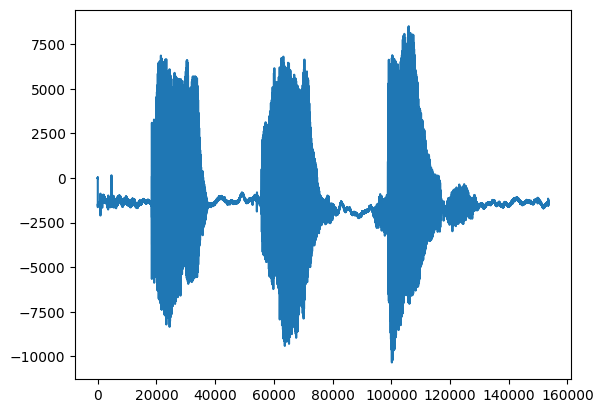

In [4]:
plt.plot(data)

In [5]:
sum = 0
for i in range(len(data)):
  sum = sum + data[i]
mean = sum/len(data)
signal = []
for i in range(len(data)):
  signal.append(data[i]-mean)
# speech

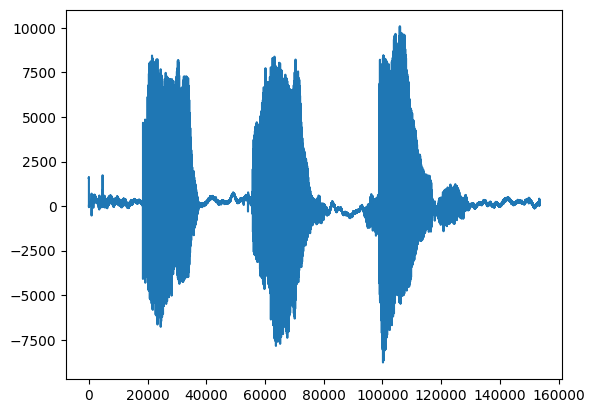

In [6]:
plt.plot(signal)

In [7]:
speech = []
for i in range(len(signal)):
  if(signal[i]>800 or signal[i]<(-800)):
    speech.append(signal[i])

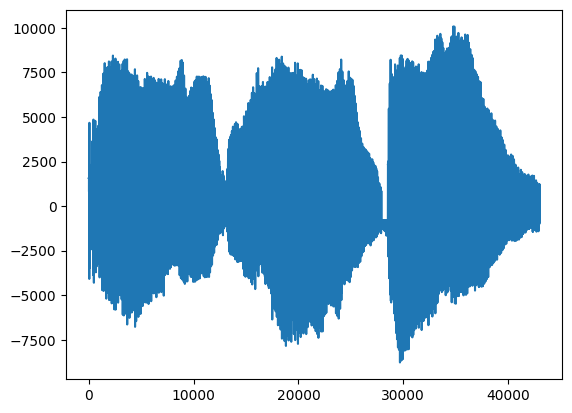

In [8]:
plt.plot(speech)

In [9]:
non_speech = []
for i in range(len(signal)):
  if(signal[i]<=800 and signal[i]>=(-800)):
    non_speech.append(signal[i])

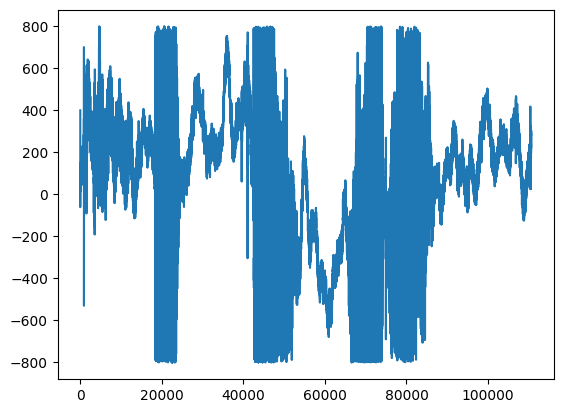

In [10]:
plt.plot(non_speech)

In [11]:
threshold1 = 5
threshold2 = -5
utterance = False
voiced = []
unvoiced = []
for i in range(len(data)):
  if(data[i] > threshold1):
    utterance = True
    voiced.append(data[i])
    continue
  if(data[i]<threshold1 and data[i]>threshold2):
    utterance = False
    unvoiced.append(data[i])



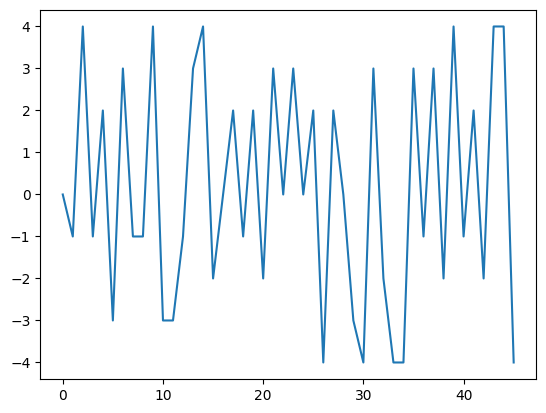

In [12]:
plt.plot(unvoiced)

**2. Evaluate the clinical component distortion (CCD) measure for the
filtered ECG signals. The CCD measure is evaluated by comparing
the diagnostic features of original ECG and filtered ECG signals.
First, you have to evaluate two diagnostic features such as R-wave
amplitude and RR-interval for original ECG and filtered ECG.
Then, the CCD measure is defined as the Mahalanobis distance
between the diagnostic features of original ECG and filtered ECG.
Diagnostic features of original ECG, α= [RR-amp, RR-interval]
Diagnostic features of filtered ECG, β= [RR-amp, RR-interval]
CCD = (α − β ) T D(α − β ),
Where D is the diagonal weight matrix and it is given by

D=[0.75 0
  0   0.25]
**

In [13]:
mat = sio.loadmat('original_ECG.mat')

In [14]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 13 11:22:04 2015',
 '__version__': '1.0',
 '__globals__': [],
 'original': array([[39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
         58.8477386 , 62.91896577]])}

In [15]:
ecg = mat['original'].reshape((-1))

[39.60475775 40.07076881 40.5922544  ... 54.22427311 58.8477386
 62.91896577]


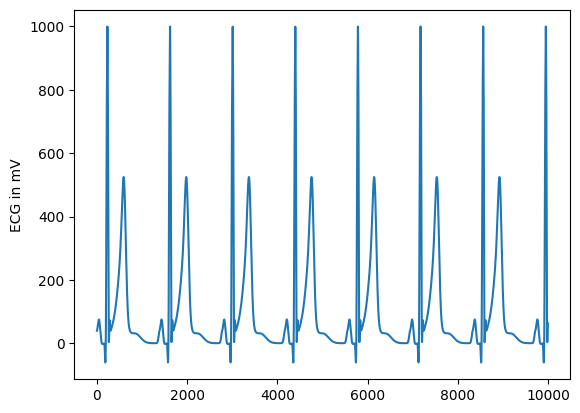

In [16]:

# ecg = sio.loadmat('givenECG3.mat')['givenECG3'].reshape((-1))
print(ecg)
plt.plot(ecg)
plt.ylabel("ECG in mV")
plt.show()

In [17]:
ecg

array([39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
       58.8477386 , 62.91896577])

In [18]:
sum = 0
for i in range(len(ecg)):
  sum = sum + ecg[i]
mean = sum/len(ecg)


In [19]:
# ecg1 = []
# for i in range(len(ecg)):
#   ecg1.append(ecg[i])
# ecg1 = ecg1/maxi

In [20]:
# plt.plot(ecg1)

In [21]:
r_peak_init = []
index = []
for i in range(len(ecg)):
  if(ecg[i]>900):
    r_peak_init.append(ecg[i])
    index.append(i)

In [22]:
r_peak = []
r_peak_index = []
for i in range(1,len(r_peak_init)-1):
  if(r_peak_init[i] > r_peak_init[i-1] and r_peak_init[i]>r_peak_init[i+1]):
    r_peak.append(r_peak_init[i])
    r_peak_index.append(index[i])
print(r_peak)
print(r_peak_index)

[999.8009917530616, 999.5881379907961, 999.3006777112837, 999.485165227723, 999.7283019687247, 999.8951278914044, 999.9856610244751, 1000.0]
[232, 1621, 3010, 4398, 5787, 7176, 8565, 9954]


In [23]:
rr_interval = []
rr_interval.append(r_peak_index[0])
for i in range(1,len(r_peak_index)):
  rr_interval.append(r_peak_index[i]-r_peak_index[i-1])

In [24]:
rr_interval

[232, 1389, 1389, 1388, 1389, 1389, 1389, 1389]

In [25]:
alpha = [[] for i in range(2)]
for i in range(len(r_peak)):
  alpha[0].append(r_peak[i])

for i in range(len(rr_interval)):
  alpha[1].append(rr_interval[i])

In [26]:
alpha

[[999.8009917530616,
  999.5881379907961,
  999.3006777112837,
  999.485165227723,
  999.7283019687247,
  999.8951278914044,
  999.9856610244751,
  1000.0],
 [232, 1389, 1389, 1388, 1389, 1389, 1389, 1389]]

In [27]:
f = 0.5
fs = 360
ecg2 = ecg/max(ecg)
print(np.pi)
# ecg3 = mat3['givenECG3'].reshape((-1))
# print(ecg3.size)
Amp = (max(ecg2) - min(ecg2))*0.5
time = np.arange(ecg2.size)/fs
# print(np.arange(ecg3.size))
# print(time)
baseline_wander = []
for i in range(len(time)):
  t = Amp * math.sin(2*np.pi*f*time[i])
  baseline_wander.append(t)
# baseline_wander
# print(len(baseline_wander))

3.141592653589793


In [28]:
signal_noise = ecg2 + baseline_wander

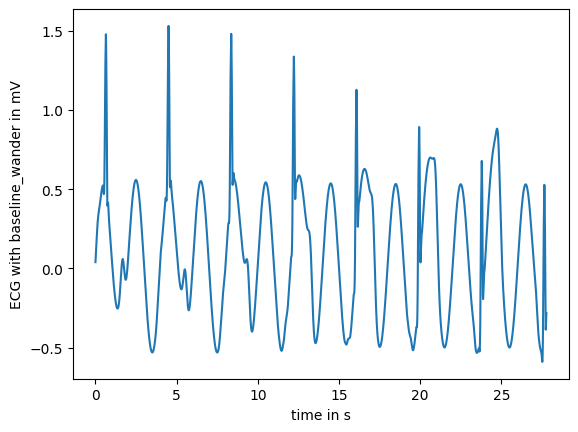

[ 0.03960476  0.04469833  0.04984702 ... -0.29715391 -0.28905123
 -0.28147429]


In [29]:
fs = 360
time = np.arange(signal_noise.size) / fs
plt.plot(time, signal_noise)
plt.xlabel("time in s")
plt.ylabel("ECG with baseline_wander in mV")
plt.show()
print(signal_noise)

In [30]:
from scipy.signal import butter, filtfilt
import numpy as np

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    print(b,a)
    y = filtfilt(b, a, data)
    print(y)
    return y

# rawdata = np.loadtxt('sampleSignal.txt', skiprows=0)
signal = signal_noise
fs = 360

cutoff = 1
order = 5
conditioned_signal = butter_highpass_filter(signal_noise, cutoff, fs, order)

[ 0.97215457 -4.86077285  9.72154571 -9.72154571  4.86077285 -0.97215457] [ 1.         -4.94352017  9.77567237 -9.66586846  4.77880076 -0.94508451]
[-0.02722737 -0.025172   -0.02309026 ... -0.20139907 -0.19018636
 -0.17928338]


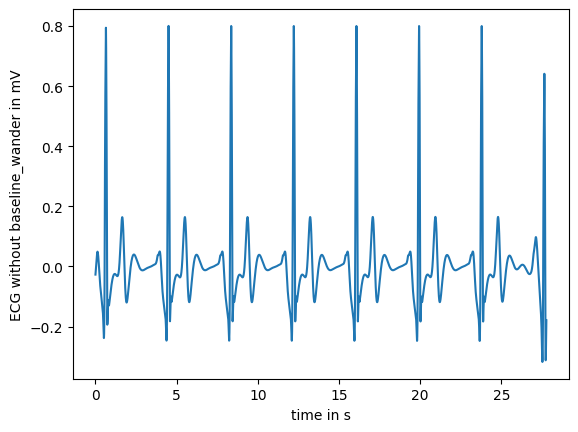

[-0.02722737 -0.025172   -0.02309026 ... -0.20139907 -0.19018636
 -0.17928338]


In [31]:
fs = 360
time = np.arange(conditioned_signal.size) / fs
plt.plot(time, conditioned_signal)
plt.xlabel("time in s")
plt.ylabel("ECG without baseline_wander in mV")
plt.show()
print(conditioned_signal)

In [32]:
filtered_ecg = conditioned_signal*max(ecg) + mean

In [33]:
filtered_ecg

array([ 77.87777365,  79.93313919,  82.01487749, ..., -96.29392832,
       -85.08121458, -74.17823762])

In [34]:
ecg

array([39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
       58.8477386 , 62.91896577])

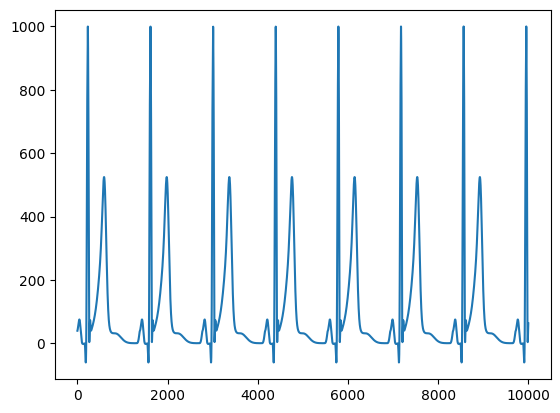

In [35]:
plt.plot(ecg)

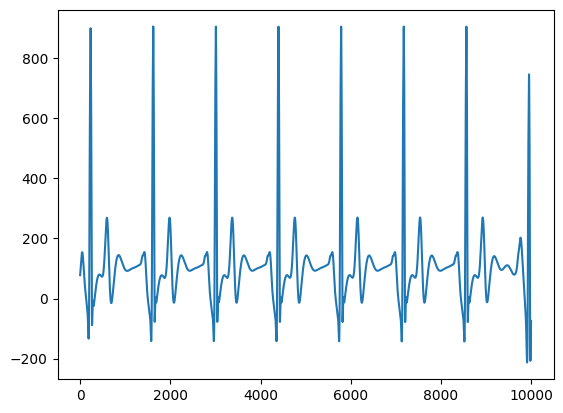

In [36]:
plt.plot(filtered_ecg)

In [37]:
r_peak_init_filtered = []
index1 = []
for i in range(len(filtered_ecg)):
  if(filtered_ecg[i]>600):
    r_peak_init_filtered.append(filtered_ecg[i])
    index1.append(i)
# r_peak_init_filtered

In [38]:
r_peak_filtered = []
r_peak_index_filtered = []
for i in range(1,len(r_peak_init_filtered)-1):
  if(r_peak_init_filtered[i] > r_peak_init_filtered[i-1] and r_peak_init_filtered[i]>r_peak_init_filtered[i+1]):
    r_peak_filtered.append(r_peak_init_filtered[i])
    r_peak_index_filtered.append(index1[i])
print(r_peak_filtered)
print(r_peak_index_filtered)

[899.650032179777, 905.6794313645302, 905.3497977076939, 905.2676445020544, 905.3205676309849, 905.2739733868972, 905.1532668403966, 746.3599752542032]
[232, 1621, 3010, 4398, 5787, 7176, 8565, 9954]


In [39]:
rr_interval_filtered = []
rr_interval_filtered.append(r_peak_index_filtered[0])
for i in range(1,len(r_peak_index_filtered)):
  rr_interval_filtered.append(r_peak_index_filtered[i]-r_peak_index_filtered[i-1])
rr_interval_filtered


[232, 1389, 1389, 1388, 1389, 1389, 1389, 1389]

In [40]:
beta = [[] for i in range(2)]
for i in range(len(r_peak_filtered)):
  beta[0].append(r_peak_filtered[i])

for i in range(len(rr_interval_filtered)):
  beta[1].append(rr_interval_filtered[i])


In [41]:
beta

[[899.650032179777,
  905.6794313645302,
  905.3497977076939,
  905.2676445020544,
  905.3205676309849,
  905.2739733868972,
  905.1532668403966,
  746.3599752542032],
 [232, 1389, 1389, 1388, 1389, 1389, 1389, 1389]]

In [42]:
# alpha = np.matrix(alpha)
alpha

[[999.8009917530616,
  999.5881379907961,
  999.3006777112837,
  999.485165227723,
  999.7283019687247,
  999.8951278914044,
  999.9856610244751,
  1000.0],
 [232, 1389, 1389, 1388, 1389, 1389, 1389, 1389]]

In [43]:
diff = [[],[]]
for i in range(len(alpha)):
    for j in range(len(alpha[i])):
        diff[i].append(alpha[i][j] - beta[i][j])
        

In [44]:
diff

[[100.15095957328458,
  93.90870662626594,
  93.95088000358976,
  94.21752072566858,
  94.40773433773984,
  94.62115450450722,
  94.83239418407857,
  253.64002474579684],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [45]:
D = [[0.75, 0],[0, 0.25]]

In [46]:
ccd = np.transpose(np.matrix(diff)) * np.matrix(D) * np.matrix(diff)

In [47]:
ccd.shape

(8, 8)

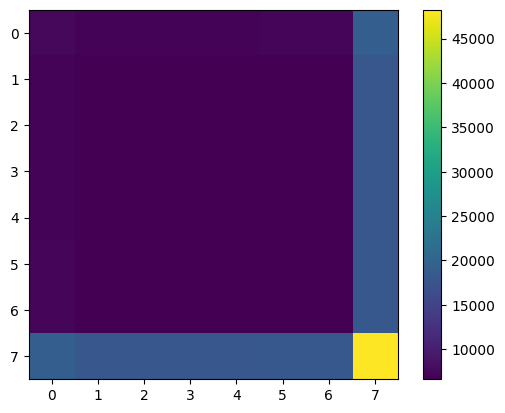

In [48]:
plt.imshow(ccd)
plt.colorbar()

In [49]:
ccd

matrix([[ 7522.66102759,  7053.78531068,  7056.95308884,  7076.98133197,
          7091.2688888 ,  7107.29956467,  7123.16645713, 19051.71889836],
        [ 7053.78531068,  6614.13388516,  6617.10422065,  6635.88413466,
          6649.28117038,  6664.31267925,  6679.19061307, 17864.2550044 ],
        [ 7056.95308884,  6617.10422065,  6620.07589009,  6638.86423795,
          6652.26729013,  6667.30554949,  6682.19016483, 17872.27764675],
        [ 7076.98133197,  6635.88413466,  6638.86423795,  6657.70590877,
          6671.14699997,  6686.22793921,  6701.15479838, 17923.00071626],
        [ 7091.2688888 ,  6649.28117038,  6652.26729013,  6671.14699997,
          6684.61522709,  6699.72661289,  6714.68360756, 17959.18505521],
        [ 7107.29956467,  6664.31267925,  6667.30554949,  6686.22793921,
          6699.72661289,  6714.87215982,  6729.86296659, 17999.7839775 ],
        [ 7123.16645713,  6679.19061307,  6682.19016483,  6701.15479838,
          6714.68360756,  6729.86296659,  674